In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer, WordNetLemmatizer
%matplotlib inline


C:\Users\poude_9elal6v\AppData\Local\Temp\ipykernel_5824\2723845752.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('./dataset/train.csv')

df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [3]:
# Select only the relevant columns
selected_columns = ['id', 'comment_text', 'toxic', 'obscene', 'insult']
new_df = df[selected_columns]

# Display the first 10 rows of the new DataFrame
new_df.head(10)

,id,comment_text,toxic,obscene,insult
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0


In [4]:
new_df.shape
new_df.dtypes
new_df.columns


Index(['id', 'comment_text', 'toxic', 'obscene', 'insult'], dtype='object')

In [5]:
new_df.describe()

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            159571 non-null  object
 1   comment_text  159571 non-null  object
 2   toxic         159571 non-null  int64 
 3   obscene       159571 non-null  int64 
 4   insult        159571 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 6.1+ MB


In [6]:
rowsums=new_df.iloc[:,2:].sum(axis=1)
new_df['clean']=(rowsums==0)
new_df['clean'].sum()

C:\Users\poude_9elal6v\AppData\Local\Temp\ipykernel_5824\1042148696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['clean']=(rowsums==0)


143422

In [7]:
# Total no.of toxic comments
len(new_df[new_df['toxic']==1])

15294

In [8]:
comment = new_df['comment_text']
for i in range(5):
    print(i,"- " + comment[i] + "\n Length -" ,len(comment[i]))

0 - Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27
 Length - 264
1 - D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)
 Length - 112
2 - Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.
 Length - 233
3 - "
More
I can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have a

In [9]:
# creating a numpy array of the length of each comment in the dataset.
x = np.array([len(comment[i]) for i in range(comment.shape[0])])

print("""The maximum length of comment is:{} 
        \nThe minimum length of the comment is:{} 
        \nAnd the average length of a comment is: {}""".format(x.max(),x.min(),x.mean()))

The maximum length of comment is:5000 
        
The minimum length of the comment is:6 
        
And the average length of a comment is: 394.0732213246768


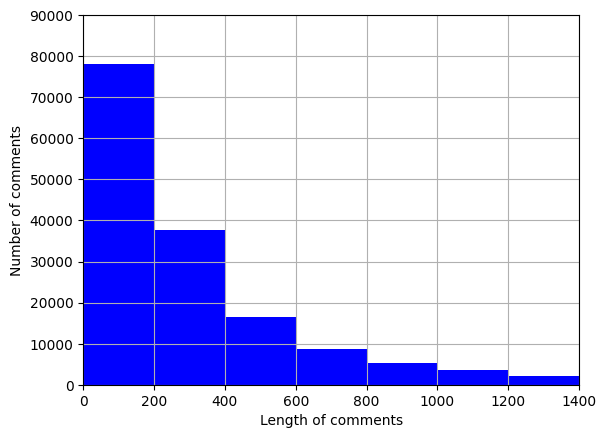

In [10]:
bins = [1,200,400,600,800,1000,1200,1400]
plt.hist(x, bins=bins, color = 'Blue')
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.axis([0, 1400, 0, 90000])
plt.grid(True)
plt.show()

In [11]:
label = new_df[['toxic',  'obscene' ,  'insult']]
print(label.head(10))
label = label.values
label.shape

   toxic  obscene  insult
0      0        0       0
1      0        0       0
2      0        0       0
3      0        0       0
4      0        0       0
5      0        0       0
6      1        1       1
7      0        0       0
8      0        0       0
9      0        0       0


(159571, 3)

In [12]:

# creating a list of comments with less than 400 length of words.
trim_comments = [comment[i] for i in range(comment.shape[0]) if len(comment[i])<=400 ]

In [13]:

# creating corresponding labels for those comments
my_labels = np.array([label[i] for i in range(comment.shape[0]) if len(comment[i])<=400 ])

In [14]:
my_labels[:10, :]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0]], dtype=int64)

In [15]:
my_labels[:10, :]

print(len(trim_comments))
print(len(my_labels))
print("Thus number of removed comments = {}".format(159571-115910))

print(len(trim_comments))
print(my_labels.shape)

115910
115910
Thus number of removed comments = 43661
115910
(115910, 3)


In [16]:
# Punctuation removal

import string
print(string.punctuation)
punctuation_edit = string.punctuation.replace('\'','') +"0123456789"
print (punctuation_edit)
outtab = "                                         "
trantab = str.maketrans(punctuation_edit, outtab)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
!"#$%&()*+,-./:;<=>?@[\]^_`{|}~0123456789


In [17]:
import nltk
nltk.download('stopwords')

# Stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Adding alphabets to the set
for i in range(ord('a'),ord('z')+1):
    stop_words.add(chr(i))
print(stop_words)


{'yourself', 'c', 'by', 'n', 'any', 'out', 'our', 'again', 'their', 'through', 'your', 'same', 'y', 'once', 'on', 'we', 'itself', 'my', 'b', 'be', "isn't", 'too', 'is', 'down', 'most', 'will', 'g', 'shouldn', 'its', 'further', 'to', 'the', "don't", 'with', 'during', 'so', 'doesn', 'u', 'which', "shouldn't", 'who', 'these', 'below', "weren't", 'can', 'have', 'are', 'she', 'needn', 'ma', 'w', "mightn't", "didn't", 'then', 'weren', 'll', 'shan', 'where', 'when', 'her', "shan't", 'him', 'myself', 'has', 'you', 'me', 'more', 'an', 'what', 'after', 'nor', 'wasn', 'for', 'they', 'does', 'from', 't', "needn't", "you're", 'ain', 'until', 're', 'this', 's', 'herself', 'having', 'ours', 'above', 'e', 'between', 'doing', 'had', 'than', 'aren', 'why', 'mustn', 'm', 'hadn', 'if', 'under', 'such', 'all', 'own', 'p', "you've", "you'll", 'it', 'himself', 'was', 'off', "she's", "wouldn't", 'l', 'over', 'v', 'f', 'do', 'them', 'up', 'won', 'yours', 'as', 'didn', 'other', 'or', 'am', 'into', 'each', 'not'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\poude_9elal6v\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
# Stemming and Lemmatizing
from nltk.stem import WordNetLemmatizer, PorterStemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [19]:
import nltk
nltk.download('wordnet')
for i in range(len(trim_comments)):
    trim_comments[i] = trim_comments[i].lower().translate(trantab)
    word_list = []
    for word in trim_comments[i].split():
        if not word in stop_words:
            word_list.append(stemmer.stem(lemmatizer.lemmatize(word,pos="v")))
    trim_comments[i]  = " ".join(word_list)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\poude_9elal6v\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:

# Comments after stop words removal, stemming and lemmatizing.
for i in range(5):
    print(trim_comments[i],"\n")

explan edit make usernam hardcor metallica fan revert vandal closur ga vote new york doll fac pleas remov templat talk page sinc i'm retir 

d'aww match background colour i'm seemingli stick thank talk januari utc 

hey man i'm realli tri edit war guy constantli remov relev inform talk edit instead talk page seem care format actual info 

sir hero chanc rememb page that' 

congratul well use tool well · talk 



In [21]:
from sklearn.feature_extraction.text import CountVectorizer
# Applying count vectorizer
# count_vector = CountVectorizer(stop_words='english')

 
# tf = count_vector.fit_transform(trim_comments[:40000]).toarray()

custom_stop_words_list = list(stop_words)
count_vector = CountVectorizer(stop_words=custom_stop_words_list)
tf = count_vector.fit_transform(trim_comments[:40000]).toarray()

In [35]:
joblib.dump(count_vector, "count_vector.joblib")

['count_vector.joblib']

In [22]:
tf.shape

(40000, 37844)

In [23]:
def shuffle(matrix, target, test_proportion):
    ratio = int(matrix.shape[0]/test_proportion)
    X_train = matrix[ratio:,:]
    X_test =  matrix[:ratio,:]
    Y_train = target[ratio:,:]
    Y_test =  target[:ratio,:]
    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = shuffle(tf, my_labels[:40000],3)

print(X_test.shape)
print(X_train.shape)

(13333, 37844)
(26667, 37844)


In [24]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

def evaluate_score(Y_test,predict): 
    loss = hamming_loss(Y_test,predict)
    print("Hamming_loss : {}".format(loss*100))
    accuracy = accuracy_score(Y_test,predict)
    print("Accuracy : {}".format(accuracy*100))
    try : 
        loss = log_loss(Y_test,predict)
    except :
        loss = log_loss(Y_test,predict.toarray())
    print("Log_loss : {}".format(loss))

In [25]:
import numpy as np

# class SVM:
#     def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
#         self.learning_rate = learning_rate
#         self.lambda_param = lambda_param
#         self.n_iters = n_iters
#         self.weights = None
#         self.bias = None

#     def fit(self, X, y):
#         n_samples, n_features = X.shape

        
#         self.weights = np.zeros(n_features)
#         self.bias = 0

#         # Convert labels to 1 or -1
#         y_ = np.where(y <= 0, -1, 1)

#         for _ in range(self.n_iters):
#             for idx, x_i in enumerate(X):
#                 condition = y_[idx] * (np.dot(x_i, self.weights) - self.bias) >= 1
#                 if condition:
#                     self.weights -= self.learning_rate * (2 * self.lambda_param * self.weights)
#                 else:
#                     self.weights -= self.learning_rate * (2 * self.lambda_param * self.weights - np.dot(x_i, y_[idx]))
#                     self.bias -= self.learning_rate * y_[idx]

#     def predict(self, X):
#         linear_output = np.dot(X, self.weights) - self.bias
#         return np.sign(linear_output)



In [26]:
label_plot = ['toxic', 'obscene', 'insult']

In [28]:
import numpy as np
from sklearn.svm import SVC
import joblib

class MyBinaryRelevance:
    def __init__(self, classifier, max_iterations=10):
        self.classifier = classifier
        self.models = []
        self.max_iterations = max_iterations
        self.history = {"loss": []} 

    def fit(self, X_train, Y_train):
        num_labels = Y_train.shape[1]

        for i in range(num_labels):
            # Instantiate the SVC model with a linear kernel
            model = self.classifier(kernel='linear')
            print(f"Training model for label {i + 1}/{num_labels}")
            model.fit(X_train, Y_train[:, i])
            self.models.append(model)

            if i + 1 == self.max_iterations:
                print(f"Training stopped after {self.max_iterations} iterations.")
                break
        joblib.dump(self.history, "training_history.joblib")

    def predict(self, X_test):
        predictions = np.zeros((X_test.shape[0], len(self.models)))

        for i, model in enumerate(self.models):
            predictions[:, i] = model.predict(X_test)

        return predictions


classifier = MyBinaryRelevance(classifier=SVC)
classifier.fit(X_train, Y_train)

# Save the trained model
joblib.dump(classifier, "svm_model.joblib")


Training model for label 1/3
Training model for label 2/3
Training model for label 3/3


['svm_model.joblib']

In [30]:
from sklearn.metrics import classification_report
# Load the saved model
loaded_classifier = joblib.load("svm_model.joblib")

# Use the loaded model for predictions
predictions_loaded = loaded_classifier.predict(X_test)
report = classification_report(Y_test, predictions_loaded, target_names=label_plot)
print(report)

              precision    recall  f1-score   support

       toxic       0.79      0.73      0.76      1497
     obscene       0.83      0.77      0.80       830
      insult       0.72      0.59      0.65       800

   micro avg       0.79      0.70      0.74      3127
   macro avg       0.78      0.70      0.74      3127
weighted avg       0.79      0.70      0.74      3127
 samples avg       0.08      0.07      0.07      3127



c:\ThisWorks\project\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ThisWorks\project\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ThisWorks\project\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
# Calculate scores for the loaded model
evaluate_score(Y_test, predictions_loaded)

Hamming_loss : 3.800095002375059
Accuracy : 90.92477311932798
Log_loss : 1.2523667002364067


c:\ThisWorks\project\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfTransformer

new_comment = "you fucking stupid dwarf "
new_comment = new_comment.lower().translate(str.maketrans('', '', string.punctuation))
new_comment = " ".join([stemmer.stem(lemmatizer.lemmatize(word, pos="v")) for word in new_comment.split() if word not in stop_words])

new_comment_vectorized = count_vector.transform([new_comment]).toarray()
predictions_svm = loaded_classifier.predict(new_comment_vectorized)

for i, label in enumerate(label_plot):
    print(f"{label}: {predictions_svm[0, i]}")


toxic: 1.0
obscene: 1.0
insult: 1.0


In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfTransformer

new_comment = "see my ass"
new_comment = new_comment.lower().translate(str.maketrans('', '', string.punctuation))
new_comment = " ".join([stemmer.stem(lemmatizer.lemmatize(word, pos="v")) for word in new_comment.split() if word not in stop_words])

new_comment_vectorized = count_vector.transform([new_comment]).toarray()
predictions_svm = loaded_classifier.predict(new_comment_vectorized)

for i, label in enumerate(label_plot):
    print(f"{label}: {predictions_svm[0, i]}")

toxic: 1.0
obscene: 1.0
insult: 0.0


In [34]:
from sklearn.metrics import multilabel_confusion_matrix, classification_report

# Use the loaded model for predictions
predictions_loaded = loaded_classifier.predict(X_test)

# Generate the confusion matrix
confusion_matrices = multilabel_confusion_matrix(Y_test, predictions_loaded)

# Display confusion matrix for each label
for i, label in enumerate(label_plot):
    print(f"Confusion Matrix for {label}:\n{confusion_matrices[i]}")

# Generate classification report
class_report = classification_report(Y_test, predictions_loaded, target_names=label_plot)
print("Classification Report:\n", class_report)


Confusion Matrix for toxic:
[[11553   283]
 [  410  1087]]
Confusion Matrix for obscene:
[[12375   128]
 [  191   639]]
Confusion Matrix for insult:
[[12349   184]
 [  324   476]]
Classification Report:
               precision    recall  f1-score   support

       toxic       0.79      0.73      0.76      1497
     obscene       0.83      0.77      0.80       830
      insult       0.72      0.59      0.65       800

   micro avg       0.79      0.70      0.74      3127
   macro avg       0.78      0.70      0.74      3127
weighted avg       0.79      0.70      0.74      3127
 samples avg       0.08      0.07      0.07      3127



c:\ThisWorks\project\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ThisWorks\project\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ThisWorks\project\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
